
# Hierarchical model for AGN fraction of a sample of galaxies


1. Draw $\phi$ from its marginal post. d., 
	
    $p(\phi \mid x) = \int p(\phi,\theta \mid x) d\theta, \quad
	   \text{integrating over }  \theta $
       
    $	= \frac{p(\phi,\theta \mid x)}{p(\theta \mid \phi, x)},  
		\quad \text{ or algebraically (conjugated HM)}$
        
        
2. Draw $\theta$ from its \textbf{conditional post.} d., 
	given the drawn value $\phi$, for fixed obs. $x$ (analiticaly or MCMC):
    
	$ p(\theta\mid \phi,x) = \prod_{j=1}^J p(\theta_j\mid \phi,x ) 
	\longrightarrow \theta_j \sim p(\theta_j\mid \phi,x )$
    
	
3. If desired, draw predictive values $\tilde{x}$ from \textbf{posterior predictive d.}, 
	corresponding to an existing $\theta_j$, or a future $\tilde{\theta_j}$ 
	drawn from the same super population. 


In [14]:
library(ggplot2)
library(tidyr)
library(gridExtra)

In [2]:
# DATA: 
x = c(10,10,36,10,15,12,10,18,9,19,11,10,9,10,40,9,8,10,9,7)
n=c(1083,855,3461,657,1208,1025,527,1668,583,582,917,857,680,917,3637,874,395,581,588,383)
#Evaluate densities in grid
theta <- seq(0.0001, 0.07, length.out = 1000)


## (A) Hyperparams parameterization : 

$logit(\frac{\alpha}{\alpha+\beta}) = log(\frac{\alpha}{\beta}) \quad ; \quad log(\alpha+\beta)$

### (1) Computing the MARGINAL POSTERIOR D. of hyperparams:

[1] -4.223649

[1] 6.208093

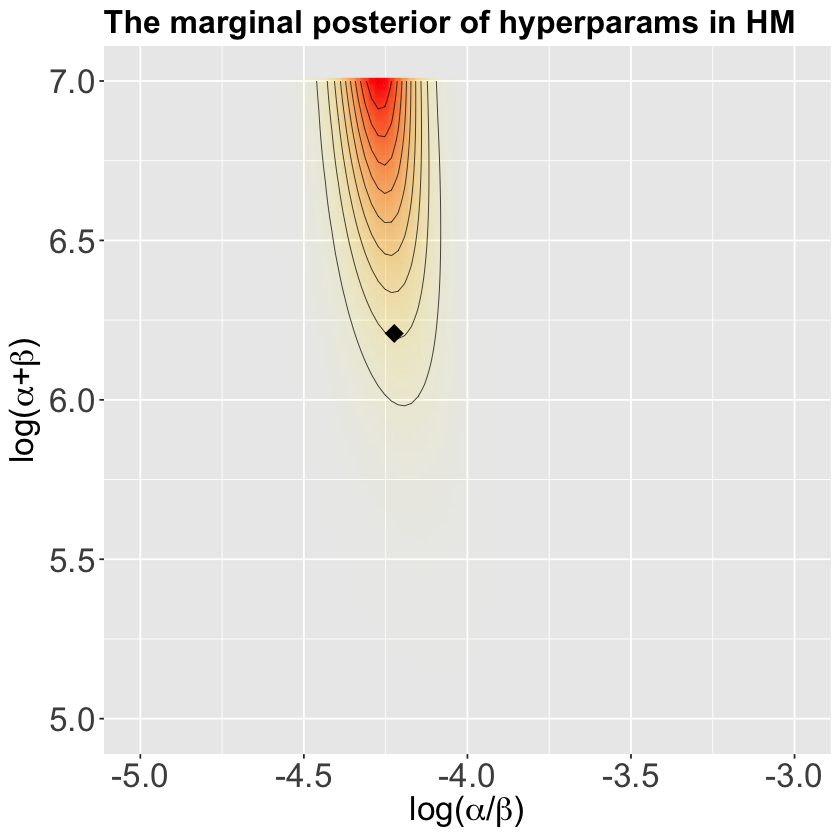

In [3]:
# Use logarithms for numerical accuracy!
lpost.marg <- function(p, q, x, n){
  a <- exp(p+q)/(1+exp(p))
  b <- exp(q)/(1+exp(p))
  log(a+b)*(-5/2) + log(a) + log(b) + 
    sum(lgamma(a+b)-lgamma(a)-lgamma(b)+lgamma(a+x)+lgamma(b+n-x)-lgamma(a+b+n))
}

# Starting point: M.M. approximations
mean_th = mean(x/n)
var_th = var(x/n)
size = mean_th*(1-mean_th)/var_th -1 # a + b
a = size*mean_th
b = size*(1-mean_th)
log(a/b); log(a+b)

# Use grid: 
P <- seq(round(log(a/b)-1.), round(log(a/b)+1.), length.out = 100)
Q <- seq(round(log(a+b)-1.), round(log(a+b)+1.), length.out = 100)
# make vectors that contain all pairwise combinations of A and B
cP <- rep(P, each = length(Q))
cQ <- rep(Q, length(P))

lp <- mapply(lpost.marg, cP, cQ, MoreArgs = list(x, n))
# Subtract maximum value to avoid over/underflow in exponentation
df_marg <- data.frame(x = cP, y = cQ, p = exp(lp - max(lp)))

# create a plot of the marginal posterior density
p_marg.post <- ggplot(data = df_marg, aes(x = x, y = y)) + 
  geom_raster(aes(fill = p, alpha = p), interpolate = T) +
  geom_contour(aes(z = p), colour = 'black', size = 0.2) +
  geom_point(data=data.frame(x=log(a/b),y=log(a+b)),shape=18,size=5) +
  #coord_cartesian(xlim = c(-5,-3), ylim = c(5, 7)) +
  labs(x = expression(paste('log(',alpha,'/',beta,')')), y = expression(paste('log(',alpha,'+',beta,')')), 
       title = 'The marginal posterior of hyperparams in HM') +
  scale_fill_gradient(low = 'yellow', high = 'red', guide = F) +
  scale_alpha(range = c(0, 1), guide = F) +
  theme(axis.text=element_text(size=20), axis.title=element_text(size=20,face="bold"),
        title =element_text(size=16, face='bold'))

p_marg.post


,x,y,p
3700,-4.272727,7,1


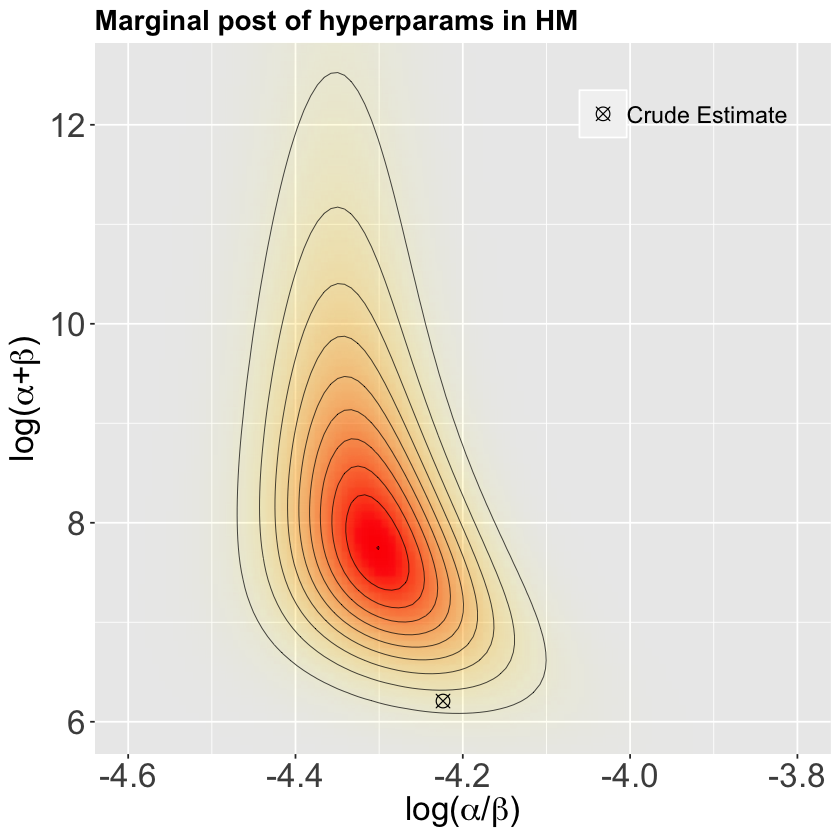

In [4]:
# Rearrange the parameters scale: 
df_marg[which.max(df_marg$p),]

p0 = df_marg[which.max(df_marg$p),1]
q0 = df_marg[which.max(df_marg$p),2]

P <- seq(p0-0.4, p0+0.4, length.out = 100)
Q <- seq(q0-2, q0+6, length.out = 100)
# make vectors that contain all pairwise combinations of A and B
cP <- rep(P, each = length(Q))
cQ <- rep(Q, length(P))
lp <- mapply(lpost.marg, cP, cQ, MoreArgs = list(x, n))
# Subtract maximum value to avoid over/underflow in exponentation
df_marg2 <- data.frame(x = cP, y = cQ, p = exp(lp - max(lp)))


ggplot(data = df_marg2, aes(x = x, y = y)) + 
  geom_raster(aes(fill = p, alpha = p), interpolate = T) +
  geom_contour(aes(z = p), colour = 'black', size = 0.2) +
  geom_point(data=data.frame(x=log(a/b),y=log(a+b)),aes(shape='1'),size=3.5) +
  coord_cartesian(xlim = c(-4.6,-3.8), ylim = c(6, 12.5)) +
  labs(x = expression(paste('log(',alpha,'/',beta,')')), 
       y = expression(paste('log(',alpha,'+',beta,')')), 
       title = 'Marginal post of hyperparams in HM') +
  scale_shape_manual(values=c(13,16), labels = c("Crude Estimate","1000 random draws")) +
  scale_fill_gradient(low = 'yellow', high = 'red', guide = F) +
  #scale_size_manual(values=c(5,1)) + 
  scale_alpha(range = c(0, 1), guide = F) +
  #guides(size = FALSE) +
  theme(axis.text=element_text(size=20),
        axis.title.y  = element_text(size=20,angle=90),
        axis.title.x = element_text(size = 20),
        title=element_text(size=14,face="bold"),
        legend.text=element_text(size=14),
        legend.key.size = unit(1, "cm"),
        legend.position = c(0.8, 0.9), 
        legend.background = element_blank(),
        legend.title = element_blank())


In [5]:
# Post. (marginal) mode of hyperparams:
p.mode <- df_marg2[which.max(df_marg2$p),1]
q.mode <- df_marg2[which.max(df_marg2$p),2]
c(p.mode,q.mode)

# Original parameters: alfa & beta
c(exp(p.mode+q.mode)/(1+exp(p.mode)), exp(q.mode)/(1+exp(p.mode)))


[1] -4.301010  7.747475

[1]   30.96944 2284.74782

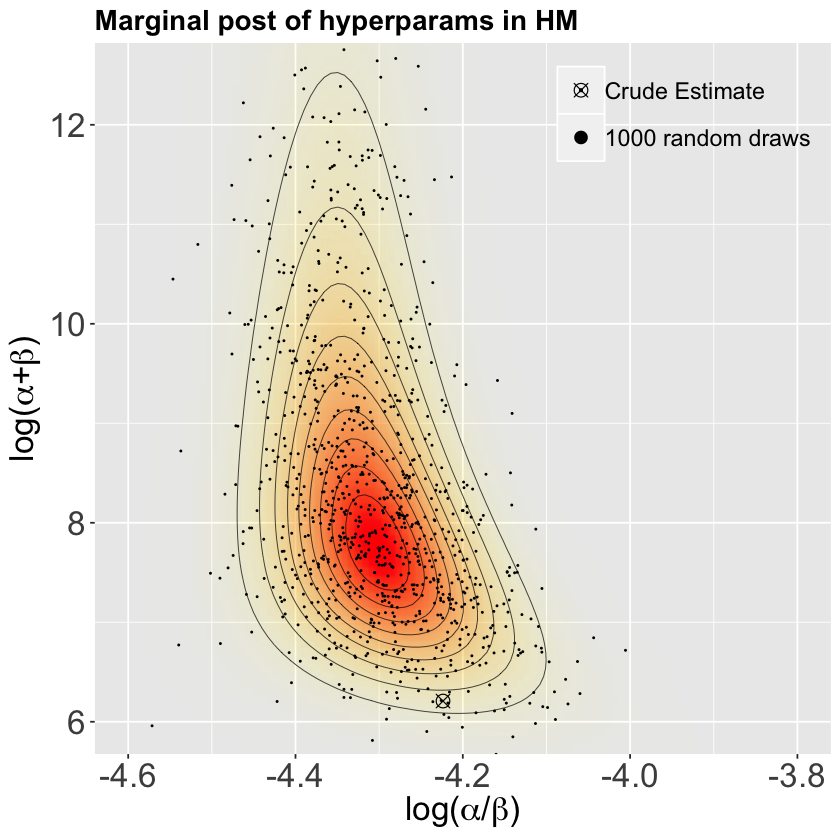

In [6]:
# SAMPLE from the grid (with replacement):
# normalize by approx. as a step function over the grid, 
# and setting up the total probability in the grid to 1
nsamp <- 1000
ind <- sample(length(df_marg2$p), size = nsamp, replace = T, prob = df_marg2$p/sum(df_marg2$p))
samp <- df_marg2[ind,]
# add random jitter, to give the simulation draws a continuous distribution
samp$x <- samp$x + runif(nsamp, P[1] - P[2], P[2] - P[1])
samp$y <- samp$y + runif(nsamp, Q[1] - Q[2], Q[2] - Q[1])



# Plotting all together
p_marg.post2 <- ggplot(data = df_marg2, aes(x = x, y = y)) + 
  geom_raster(aes(fill = p, alpha = p), interpolate = T) +
  geom_contour(aes(z = p), colour = 'black', size = 0.2) +
  geom_point(data=data.frame(x=log(a/b),y=log(a+b)),aes(shape='1'),size=3.5) +
  geom_point(data = samp, aes(x = x, y = y,shape='2'),size=0.5) +
  coord_cartesian(xlim = c(-4.6,-3.8), ylim = c(6, 12.5)) +
  labs(x = expression(paste('log(',alpha,'/',beta,')')), 
       y = expression(paste('log(',alpha,'+',beta,')')), 
       title = 'Marginal post of hyperparams in HM') +
  scale_shape_manual(values=c(13,16), labels = c("Crude Estimate","1000 random draws")) +
  scale_fill_gradient(low = 'yellow', high = 'red', guide = F) +
  #scale_size_manual(values=c(5,1)) + 
  scale_alpha(range = c(0, 1), guide = F) +
  #guides(size = FALSE) +
  theme(axis.text=element_text(size=20),
        axis.title.y  = element_text(size=20,angle=90),
        axis.title.x = element_text(size = 20),
        title=element_text(size=14,face="bold"),
        legend.text=element_text(size=14),
        legend.key.size = unit(1, "cm"),
        legend.position = c(0.8, 0.9), 
        legend.background = element_blank(),
        legend.title = element_blank())

p_marg.post2

In [7]:
# Posterior moments:
# Post. mean of alpha: 
po.mean.a = sum(exp(df_marg$x+df_marg$y)/(1+exp(df_marg$x)) * df_marg$p/sum(df_marg$p))
# Post. mean of beta: 
po.mean.b = sum(exp(df_marg$y)/(1+exp(df_marg$x)) * df_marg$p/sum(df_marg$p))

c(po.mean.a,po.mean.b)

[1]  10.80324 759.20227

### (2) Computing the POSTERIOR COND. D. for theta params:

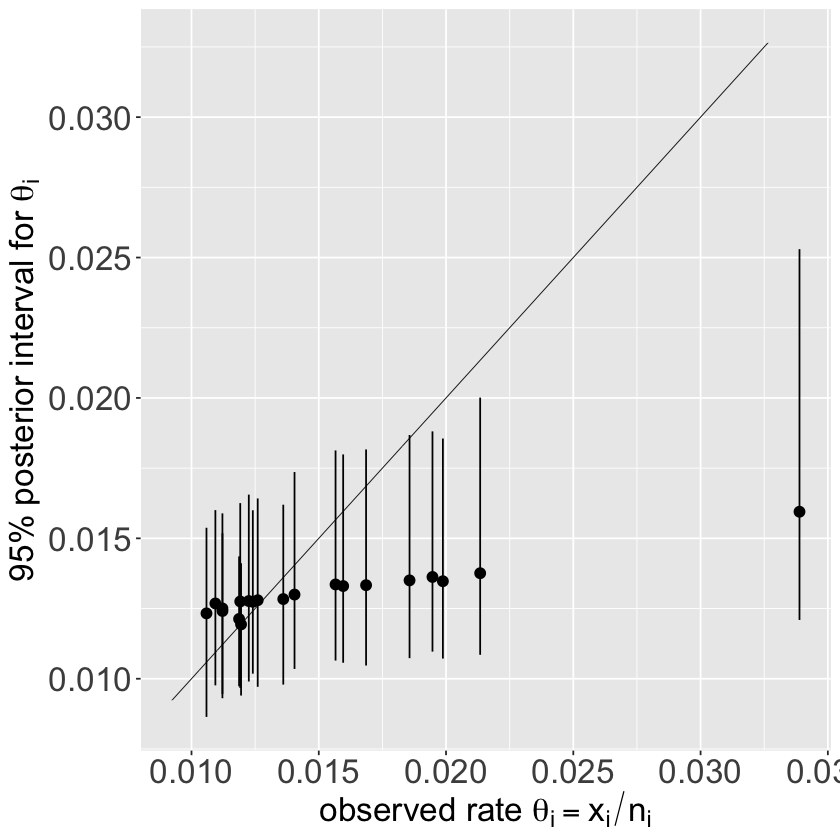

In [8]:
# Transform (p,q)=(log(a/b),log(a+b)) to the scale (a,b):
samp$alpha <- exp(samp$x+samp$y)/(1+exp(samp$x))
samp$beta <- exp(samp$y)/(1+exp(samp$x))

post.theta <- array(0,c(nsamp,length(n)))

for(i in 1:nsamp) post.theta[i,]  <- mapply(function(a, b, x,n) rbeta(1, a+x, b+n-x),
                                            samp$alpha[i], samp$beta[i], x,n) 

# Plotting post median and 95% interval of AGN rates vs. observed rates:
p_cond.post <- ggplot() + 
  # horizontal postions have been jittered to reduce overlap:
  geom_pointrange(aes(x = (x/n)+runif(length(n), 0, max(x/n)/length(n)), 
                      y = as.numeric(apply(post.theta,2,median)),
                      ymax=as.numeric(apply(post.theta,2,FUN=quantile, probs=c(0.05))),
                      ymin=as.numeric(apply(post.theta,2,FUN=quantile, probs=c(0.95))))) +
  geom_line(aes(x=x/n,y=x/n),size=0.25) + # unpooled estimates theta = y/n 
  labs(x = expression(paste("observed rate ",theta[i]==x[i]/n[i])), y = expression(paste("95% posterior interval for ",theta[i]))) +
  theme(axis.text=element_text(size=20), axis.title=element_text(size=20,face="bold"))

p_cond.post
#grid.arrange(p_marg.post2,p_cond.post,ncol=2)

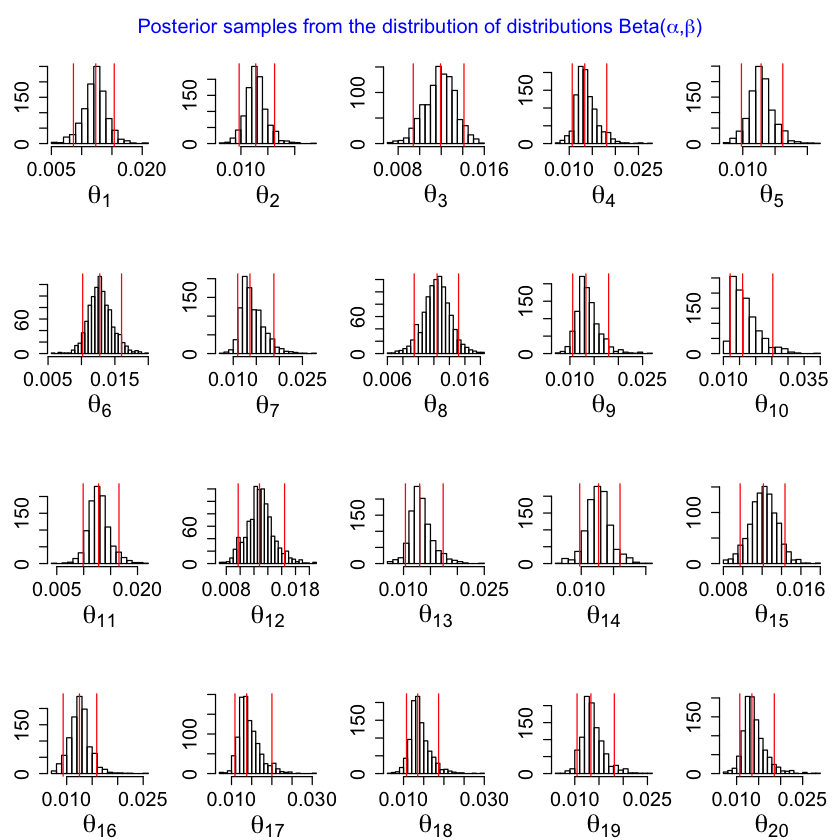

In [10]:
# Posterior samples from the distribution of distributions Beta(a,b)
par(mfrow=c(4,5),mar=c(4,3,4,1))
for(j in 1:20){
  hist(post.theta[,j],xlab = substitute(theta[j], list(j = j)), ylab = '', 
       main = "",breaks = 20,cex.axis=1.5,cex.lab=2)
  abline(v=quantile(post.theta[,j],c(0.05,0.5,0.95)),col=2)
}
mtext(expression(paste("Posterior samples from the distribution of distributions Beta(",
                       alpha,",",beta,")")), 
      side = 3, line = -2.5, outer = TRUE,col="blue",cex=1)



### Compare the separate model and hierarchical model 

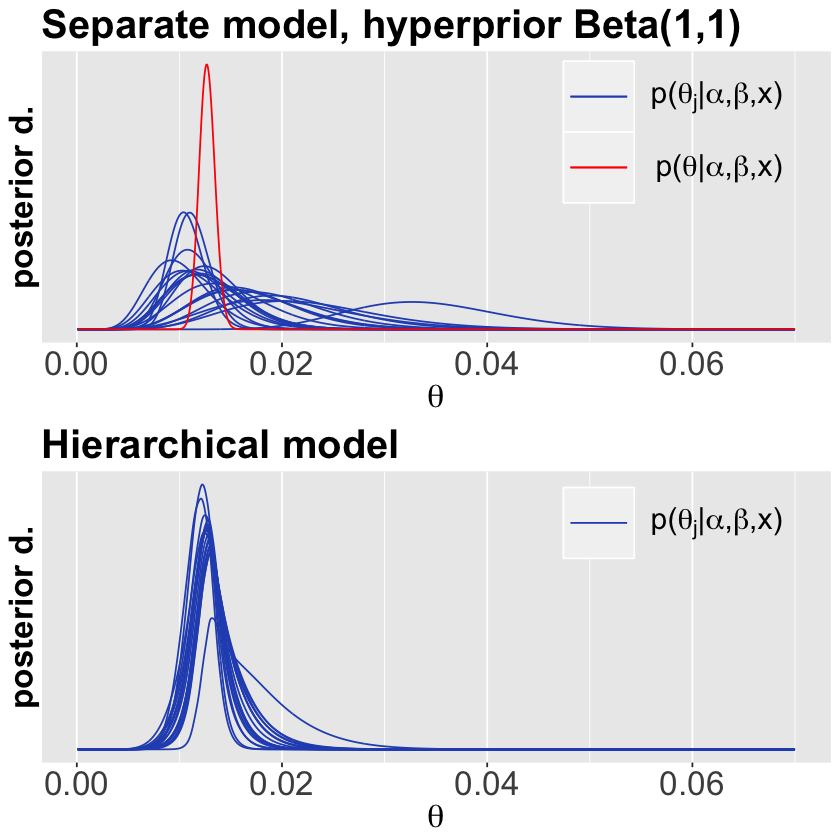

In [16]:
# Create plot for the separate model
col = c("#2A52BE","#1B9E77","#7570B3","#D95F02")

# Uniform hyper-prior: Beta(1,1)
# Posterior distributions for each component of theta is Beta(x+1,n-x+1)
lpost <- function(n, x, theta) dbeta(theta, x+1, n-x+1)

# Separate model: 
df_sep <- mapply(lpost, n, x, MoreArgs = list(theta = theta)) %>% # multivariate version of sapply
  as.data.frame() %>% cbind(theta) %>% gather(ind, p, -theta)

# Non-Hierarchical approach: common theta for all samples,
# with Prior Beta(a,b), post. d is Beta(a+sum(x),b+sum(n-x))
df_pool <- data.frame(x = theta, p = dbeta(theta, sum(x)+1, sum(n)-sum(x)+1))


# Plot for separate (and pooled) model
plot_sep <- ggplot(data = df_sep) +
  geom_line(aes(x = theta, y = p, color = '1', group = ind)) + 
  geom_line(data = df_pool,aes(x = x, y = p, color = '2')) +
  labs(x = expression(theta), y = 'posterior d.', 
       title = 'Separate model, hyperprior Beta(1,1)', color = '') +
  scale_y_continuous(breaks = NULL) +
  scale_color_manual(values = c(col[1],'red'), 
                     labels = c(expression(paste('p(',theta[j],"|",alpha,",",beta,",",x,")")),
                                expression(paste('p(',theta,"|",alpha,",",beta,",",x,")")))) +
  theme(legend.background = element_blank(),
        axis.text=element_text(size=20),
        title=element_text(size=20,face="bold"),
        legend.text=element_text(size=18),
        legend.key.size = unit(1.5, 'cm'),
        legend.position = c(0.8,0.8))

#plot_sep

# Hierarchical model:
# Average density over samples (of a and b) for each (n,x)-pair at each point theta
lpost.hier <- function(n, x, a, b, th)
  rowMeans(mapply(dbeta, a + x, n - x + b, MoreArgs = list(x = theta)))

df_hier <- mapply(lpost.hier, n, x, MoreArgs = list(samp$alpha, samp$beta, theta)) %>%
  as.data.frame() %>% cbind(theta) %>% gather(ind, p, -theta)


# Create plot for the hierarchical model
# Note that these marginal posteriors for theta_j are more narrow than in the separate model case, 
# due to the borrowed information from the other theta_j’s
plot_hier <- ggplot(data = df_hier) +
  geom_line(aes(x = theta, y = p, color = '1', group = ind)) + 
  #geom_line(data = df_pool,aes(x = x, y = p, color = '2')) +
  labs(x = expression(theta), y = 'posterior d.', 
       title = 'Hierarchical model', color = '') +
  scale_y_continuous(breaks = NULL) +
  scale_color_manual(values = c(col[1],'red'), 
                     labels = expression(paste('p(',theta[j],"|",alpha,",",beta,",",x,")"))) +
  theme(legend.background = element_blank(),
        axis.text=element_text(size=20),
        title=element_text(size=20,face="bold"),
        legend.text=element_text(size=18),
        legend.key.size = unit(1.5, 'cm'),
        legend.position = c(0.8,0.9))

#plot_hier
grid.arrange(plot_sep, plot_hier)


### 3) If desired, draw predictive values x from post. pred. d given theta


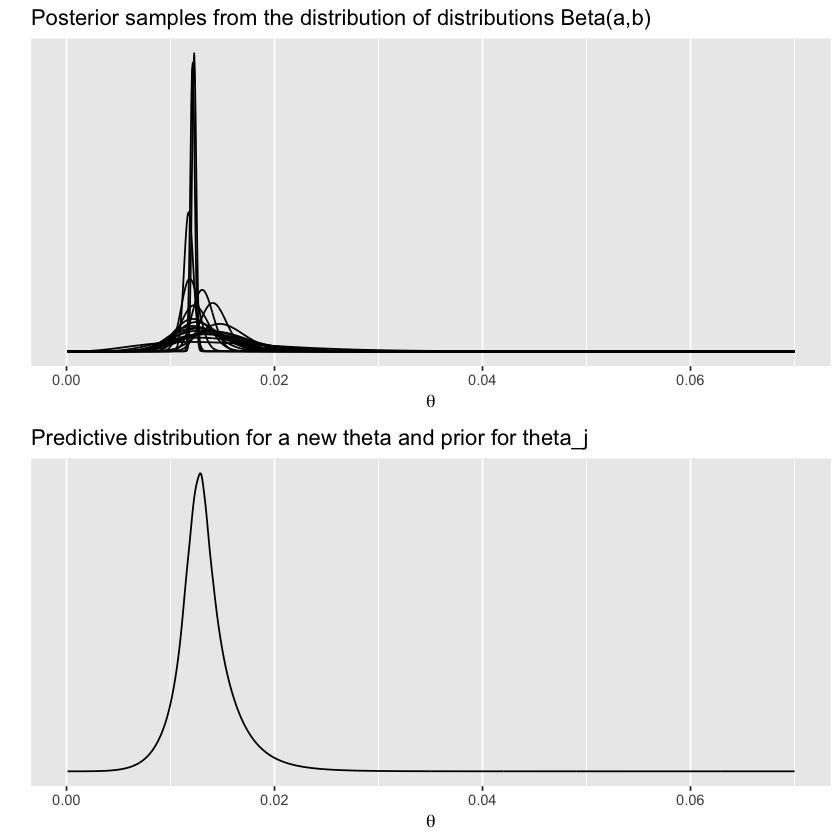

In [17]:
df_psamp <- mapply(function(a, b, th) dbeta(th, a, b),
                   samp$alpha, samp$beta, MoreArgs = list(th = theta)) %>%
  as.data.frame() %>% cbind(theta) %>% gather(ind, p, -theta)

# helper function to convert ind to numeric for subsetting
indtonum <- function(x) strtoi(substring(x,2))

plot_psamp <- ggplot(data = subset(df_psamp, indtonum(ind) <= 20)) +
  geom_line(aes(x = theta, y = p, group = ind)) +
  labs(x = expression(theta), y = '', 
       title = 'Posterior samples from the distribution of distributions Beta(a,b)') +
  scale_y_continuous(breaks = NULL)

#plot_psamp

# The average of above distributions, is the predictive distribution for a new theta, 
# and also the prior distribution for theta_j
df_psampmean <- spread(df_psamp, ind, p) %>% subset(select = -theta) %>%
  rowMeans() %>% data.frame(theta = theta, p = .)

# Create plot for samples from the predictive distribution for new theta
plot_psampmean <- ggplot(data = df_psampmean) +
  geom_line(aes(x = theta, y = p)) +
  labs(x = expression(theta), y = '', 
       title = 'Predictive distribution for a new theta and prior for theta_j') +
  scale_y_continuous(breaks = NULL)


#Combine the plots
grid.arrange(plot_psamp, plot_psampmean)